In [1]:
# Consolidated Imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

# Function to Set Root Path and List Contents
def setup_dataset_path(path):
    print(list(os.listdir(path)))

# Function to Load Data from CSV
def load_data_from_csv(file_path):
    return pd.read_csv(file_path)

# Function to Explore DataFrame
def explore_dataframe(df):
    df.info()

# Example Usage
root_path = 'C:/Datasets/jpeg-melanoma-512x512/'
setup_dataset_path(root_path)
df = load_data_from_csv(root_path + 'train.csv')
explore_dataframe(df)


['sample_submission.csv', 'test', 'test.csv', 'train', 'train.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
mem

In [6]:
# Function for Data Quality Checks
def data_quality_checks(df):
    print("Null Values in Each Column:")
    print(df.isna().sum())
    for col in ['image_name', 'patient_id']:
        has_duplicates = df[col].nunique() != len(df[col])
        print(f"Does {col} have any duplicates?: {has_duplicates}")

# Function for Categorical Data Analysis
def analyze_categorical_data(df, column_name):
    print(f"Value Counts for {column_name}:")
    print(df[column_name].value_counts())
    print(f"Normalized Value Counts for {column_name}:")
    print(df[column_name].value_counts(normalize=True))

# Example Usage
data_quality_checks(df)
analyze_categorical_data(df, 'sex')


Null Values in Each Column:
image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
tfrecord                           0
width                              0
height                             0
dtype: int64
Does image_name have any duplicates?: False
Does patient_id have any duplicates?: True
Value Counts for sex:
male      17080
female    15981
Name: sex, dtype: int64
Normalized Value Counts for sex:
male      0.516621
female    0.483379
Name: sex, dtype: float64


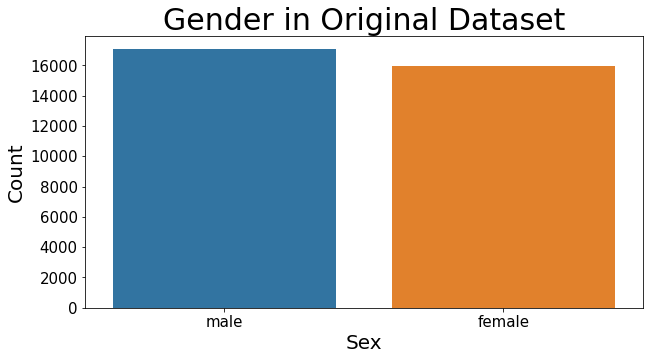

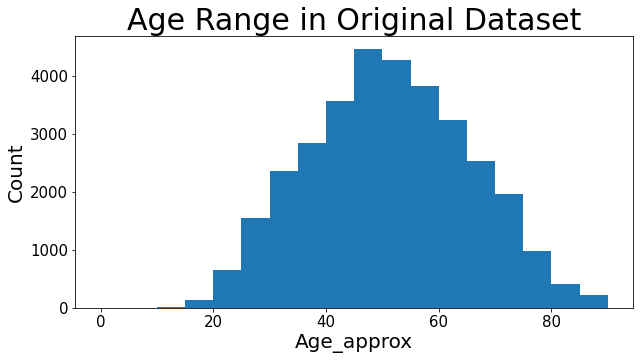

Value Counts for melanoma:
1    584
Name: target, dtype: int64


In [7]:
# Function for Visualizing Categorical Distributions
def visualize_categorical_distribution(df, column_name, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column_name)
    plt.xlabel(column_name.capitalize(), fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=30)
    plt.show()

# Function for Analyzing Numerical Data
def analyze_numerical_data(df, column_name, bins, title):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=bins)
    plt.xlabel(column_name.capitalize(), fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=30)
    plt.show()

# Function for Specific Diagnosis Analysis
def analyze_specific_diagnosis(df, diagnosis_name):
    print(f"Value Counts for {diagnosis_name}:")
    print(df[df['diagnosis'] == diagnosis_name]['target'].value_counts())

# Example Usage
visualize_categorical_distribution(df, 'sex', "Gender in Original Dataset")
analyze_numerical_data(df, 'age_approx', 18, "Age Range in Original Dataset")
analyze_specific_diagnosis(df, 'melanoma')


In [45]:
#Add a column with the path to each images jpeg
df['path_jpeg'] = root_path + 'train/' + df['image_name'] + '.jpg'
print(df['image_name'][0])
print(df['path_jpeg'][0])

ISIC_2637011
C:/Datasets/jpeg-melanoma-512x512/train/ISIC_2637011.jpg


In [8]:
# Function for Non-Specific Diagnosis Analysis
def analyze_non_specific_diagnosis(df, diagnosis_name):
    print(f"Non-{diagnosis_name} Value Counts in 'target':")
    print(df[df['diagnosis'] != diagnosis_name]['target'].value_counts())

# Function to Add Image Path Column
def add_image_path_column(df, base_path, folder, column_name):
    df[f'{column_name}_path'] = base_path + folder + '/' + df[column_name] + '.jpg'

# Function for Distribution Analysis
def analyze_distribution(df, column_name, normalize=False):
    count_type = "Normalized Counts" if normalize else "Counts"
    print(f"{column_name} {count_type}:")
    print(df[column_name].value_counts(normalize=normalize))

# Example Usage
analyze_non_specific_diagnosis(df, 'melanoma')
add_image_path_column(df, root_path, 'train', 'image_name')
analyze_distribution(df, 'target')
analyze_distribution(df, 'target', normalize=True)
analyze_distribution(df, 'benign_malignant')


Non-melanoma Value Counts in 'target':
0    32542
Name: target, dtype: int64
target Counts:
0    32542
1      584
Name: target, dtype: int64
target Normalized Counts:
0    0.98237
1    0.01763
Name: target, dtype: float64
benign_malignant Counts:
benign       32542
malignant      584
Name: benign_malignant, dtype: int64


Value Counts in 'benign_malignant' when target is 0:
benign    32542
Name: benign_malignant, dtype: int64
Value Counts in 'benign_malignant' when target is 1:
malignant    584
Name: benign_malignant, dtype: int64


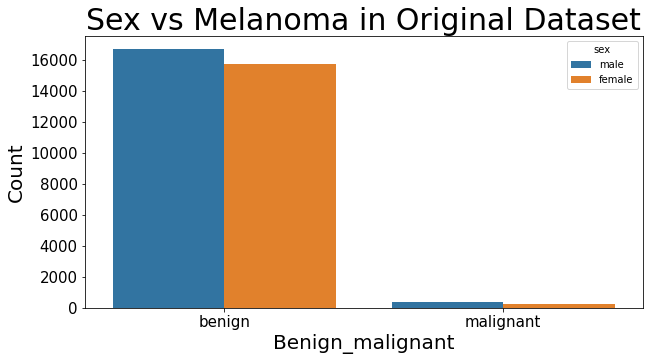

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     25331 non-null  object 
 1   patient_id                     25331 non-null  int64  
 2   sex                            25331 non-null  object 
 3   age_approx                     24894 non-null  float64
 4   anatom_site_general_challenge  22700 non-null  object 
 5   diagnosis                      25331 non-null  object 
 6   benign_malignant               25331 non-null  object 
 7   target                         25331 non-null  int64  
 8   tfrecord                       25331 non-null  int64  
 9   width                          25331 non-null  int64  
 10  height                         25331 non-null  int64  
 11  path_jpeg                      25331 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usag

In [11]:
# Function for Data Validation
def validate_data_relationship(df, target_col, related_col):
    for value in df[target_col].unique():
        print(f"Value Counts in '{related_col}' when {target_col} is {value}:")
        print(df[df[target_col] == value][related_col].value_counts())

# Function for Visualizing Data Distribution with Hue
def visualize_data_distribution_with_hue(df, column_name, hue, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column_name, hue=hue)
    plt.xlabel(column_name.capitalize(), fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(title, fontsize=30)
    plt.show()

# Function to Load Additional Dataset
def load_additional_dataset(file_path, new_column_base_path):
    df = pd.read_csv(file_path)
    df['path_jpeg'] = new_column_base_path + df['image_name'] + ".jpg"
    return df

# Example Usage
validate_data_relationship(df, 'target', 'benign_malignant')
visualize_data_distribution_with_hue(df, 'benign_malignant', 'sex', "Sex vs Melanoma in Original Dataset")
df_2019 = load_additional_dataset("C:/Datasets/jpeg-isic2019-512x512/train.csv", "C:/Datasets//jpeg-isic2019-512x512/train/")
df_2019.info()


In [13]:
# Function for Printing Distribution in Dataset
def print_dataset_distribution(df, columns):
    for col in columns:
        print(f"Distribution in '{col}':")
        print(df[col].value_counts())

# Function to Filter DataFrame Based on Condition
def filter_dataframe(df, column, condition):
    return df[df[column] == condition]

# Function to Load and Process Additional Dataset
def load_process_additional_dataset(csv_path, base_path, image_column):
    additional_df = pd.read_csv(csv_path)
    additional_df['path_jpeg'] = base_path + additional_df[image_column] + ".jpg"
    return additional_df

# Example Usage
print_dataset_distribution(df_2019, ['target', 'benign_malignant'])
df_2019_malignant = filter_dataframe(df_2019, 'benign_malignant', 'malignant')
df_more = load_process_additional_dataset("C:/Datasets/malignant-v2-512x512/train_malig_2.csv", "C:/Datasets/malignant-v2-512x512/jpeg512/", 'image_name')
df_more.info()


Distribution in 'target':
0    20809
1     4522
Name: target, dtype: int64
Distribution in 'benign_malignant':
benign       20809
malignant     4522
Name: benign_malignant, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     580 non-null    object 
 1   patient_id                     580 non-null    int64  
 2   sex                            547 non-null    object 
 3   age_approx                     557 non-null    float64
 4   anatom_site_general_challenge  471 non-null    object 
 5   diagnosis                      554 non-null    object 
 6   benign_malignant               580 non-null    object 
 7   target                         580 non-null    int64  
 8   width                          580 non-null    int64  
 9   height                         580 non-null 

Distribution in 'target':
1    580
Name: target, dtype: int64
Distribution in 'benign_malignant':
malignant    580
Name: benign_malignant, dtype: int64
Distribution in 'benign_malignant':
benign       32542
malignant     5686
Name: benign_malignant, dtype: int64


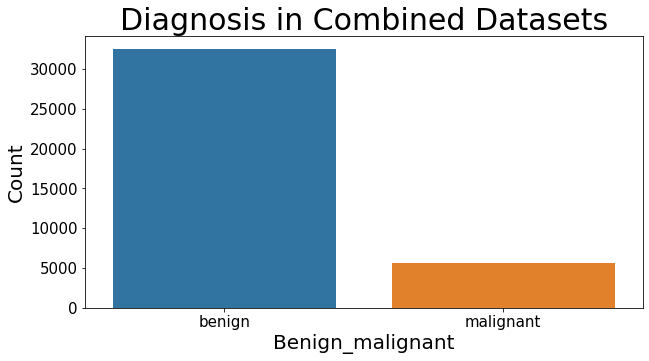

In [14]:
# Function for Displaying Distribution in Dataset
def display_dataset_distribution(*dataframes, columns):
    for df in dataframes:
        print_dataset_distribution(df, columns)

# Function to Combine Multiple DataFrames
def combine_dataframes(*dfs):
    return pd.concat(dfs)

# Function for Data Splitting
def split_dataset(df, features, target, test_size_first, test_size_second, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=test_size_first, random_state=random_state, stratify=df[target])
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size_second, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Example Usage
display_dataset_distribution(df_more, columns=['target', 'benign_malignant'])
df_combined = combine_dataframes(df, df_2019_malignant, df_more)
print_dataset_distribution(df_combined, ['benign_malignant'])
visualize_data_distribution_with_hue(df_combined, 'benign_malignant', None, "Diagnosis in Combined Datasets")
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(df_combined, features=['path_jpeg'], target='benign_malignant', test_size_first=0.1, test_size_second=0.25)


In [15]:
# Function to Combine Features and Labels into a DataFrame
def reassemble_data(features_df, labels_df):
    return pd.concat([features_df, labels_df], axis=1)

# Function for Checking Target Distribution
def check_target_distribution(df, column_name):
    print(f"Normalized Value Counts in '{column_name}':")
    print(df[column_name].value_counts(normalize=True))

# Example Usage
train_df = reassemble_data(X_train, y_train)
val_df = reassemble_data(X_val, y_val)
test_df = reassemble_data(X_test, y_test)

check_target_distribution(train_df, 'benign_malignant')
check_target_distribution(val_df, 'benign_malignant')


Normalized Value Counts in 'benign_malignant':
benign       0.851272
malignant    0.148728
Name: benign_malignant, dtype: float64
Normalized Value Counts in 'benign_malignant':
benign       0.851064
malignant    0.148936
Name: benign_malignant, dtype: float64


In [20]:
#Make 2 Train test splits so that we are left with:
#X_train -> 67.5% of data
#X_val -> 22.5% of data
#X_test -> 10% of data
X = df_combined[['path_jpeg']]
y = df_combined['benign_malignant']
X_use, X_test, y_use, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_use, y_use, test_size=0.25, random_state=42, stratify=y_use)

In [22]:
#Add a column with the path to each images jpeg
df['path_jpeg'] = root_path + 'train/' + df['image_name'] + '.jpg'
print(df['image_name'][0])
print(df['path_jpeg'][0])

ISIC_2637011
C:/Datasets/jpeg-melanoma-512x512/train/ISIC_2637011.jpg


In [23]:
#Read in 2019 dataset
df_2019 = pd.read_csv("C:/Datasets/jpeg-isic2019-512x512/train.csv")
df_2019['path_jpeg'] = "C:/Datasets//jpeg-isic2019-512x512/train/" + df_2019['image_name'] + ".jpg"
print(df_2019['path_jpeg'][0])

C:/Datasets//jpeg-isic2019-512x512/train/ISIC_0000000.jpg


In [24]:
#Add more malignant images that weren't used in 2020, 2019, 2018, or 2017 but were still on the ISIM website
df_more = pd.read_csv("C:/Datasets/malignant-v2-512x512/train_malig_2.csv")
df_more['path_jpeg'] = "C:/Datasets/malignant-v2-512x512/jpeg512/" + df_more['image_name'] + ".jpg"
print(df_more['path_jpeg'][0])

C:/Datasets/malignant-v2-512x512/jpeg512/ISIC_0000070.jpg


In [25]:
#Combine the 3 DataFrames into 1
df_combined = pd.concat([df, df_2019_malignant, df_more])
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38228 entries, 0 to 579
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     38228 non-null  object 
 1   patient_id                     38228 non-null  object 
 2   sex                            38130 non-null  object 
 3   age_approx                     38052 non-null  float64
 4   anatom_site_general_challenge  37465 non-null  object 
 5   diagnosis                      38202 non-null  object 
 6   benign_malignant               38228 non-null  object 
 7   target                         38228 non-null  int64  
 8   tfrecord                       38228 non-null  int64  
 9   width                          38228 non-null  int64  
 10  height                         38228 non-null  int64  
 11  image_name_path                33126 non-null  object 
 12  path_jpeg                      38228 non-null  o

In [26]:
#Make 2 Train test splits so that we are left with:
#X_train -> 67.5% of data
#X_val -> 22.5% of data
#X_test -> 10% of data
X = df_combined[['path_jpeg']]
y = df_combined['benign_malignant']
X_use, X_test, y_use, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_use, y_use, test_size=0.25, random_state=42, stratify=y_use)

In [27]:
#Combine the training data back together into 1 DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,path_jpeg,benign_malignant
32605,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_9...,benign
20810,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_6...,benign
28419,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_8...,benign
1083,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_0...,benign
15723,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_4...,benign
...,...,...
5549,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_1...,benign
12224,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_3...,benign
4822,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_1...,benign
19305,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_5...,benign


In [28]:
#Combine the validation data back together into 1 DataFrame
val_df = pd.concat([X_val, y_val], axis=1)
val_df

,path_jpeg,benign_malignant
13964,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_4...,benign
6875,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_2...,benign
8167,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_2...,benign
2475,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_0...,benign
5880,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_1...,benign
...,...,...
21344,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_6...,benign
20959,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_6...,benign
1006,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_0...,benign
8070,C:/Datasets//jpeg-isic2019-512x512/train/ISIC_...,malignant


In [29]:
#Combine the test data back together into 1 DataFrame
test_df = pd.concat([X_test, y_test], axis=1)
test_df

,path_jpeg,benign_malignant
14363,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_4...,benign
20516,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_6...,benign
15690,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_4...,benign
22253,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_6...,benign
5718,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_1...,benign
...,...,...
3861,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_1...,benign
28322,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_8...,benign
1898,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_0...,benign
27219,C:/Datasets/jpeg-melanoma-512x512/train/ISIC_8...,benign


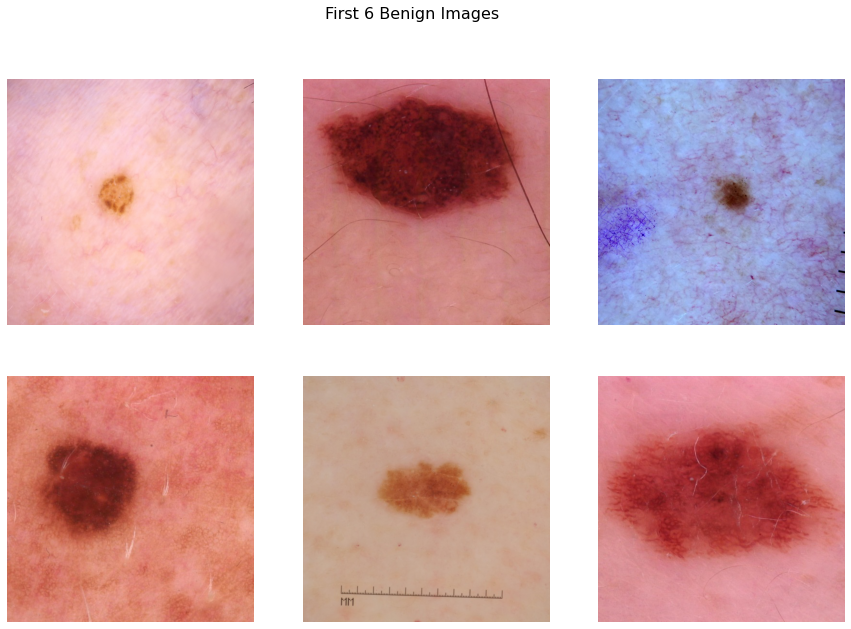

In [31]:
def visualize_images(dataframe, condition, num_images, fig_title, fig_size=(15, 10)):
    # Filter DataFrame based on condition and select a specific number of image paths
    image_paths = dataframe[dataframe['benign_malignant'] == condition]['path_jpeg'].head(num_images)

    # Initialize figure for plotting images
    plt.figure(figsize=fig_size)
    plt.suptitle(fig_title, fontsize=16)

    # Loop through the selected image paths and display each image
    for idx, path in enumerate(image_paths):
        plt.subplot(2, 3, idx + 1)
        image = plt.imread(path)
        plt.imshow(image)
        plt.axis('off')  # Hides the axis

    plt.show()

# Calling the function to visualize the first 6 benign lesions
visualize_images(train_df, 'benign', 6, 'First 6 Benign Images')


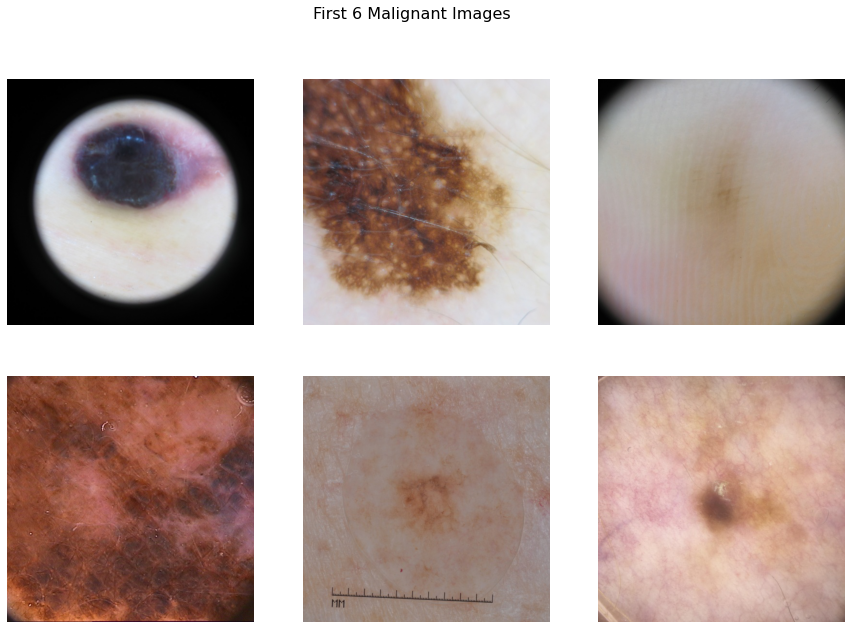

In [32]:
# Using the function to visualize the first 6 malignant lesions
visualize_images(train_df, 'malignant', 6, 'First 6 Malignant Images')


In [72]:
#Generate Image Data, resizing each image to 128x128
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(train_df, 
                                                                x_col='path_jpeg', 
                                                                y_col='benign_malignant',
                                                                seed=42,
                                                                target_size=(128, 128),
                                                                batch_size=len(X_train),
                                                                class_mode='binary') 
#For this ImageDataGenerator, divide the dataframe into 3 batches for conserve computer memory
train_generator_third = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(train_df, 
                                                                x_col='path_jpeg', 
                                                                y_col='benign_malignant',
                                                                seed=42,
                                                                target_size=(128, 128),
                                                                batch_size=int(len(X_train)/3),
                                                                class_mode='binary') 
val_generator = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(val_df, 
                                                                x_col='path_jpeg', 
                                                                y_col='benign_malignant',
                                                                seed=42,
                                                                target_size=(128, 128), 
                                                                batch_size = len(X_val),
                                                                class_mode='binary') 
test_generator = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(test_df, 
                                                                x_col='path_jpeg',
                                                                y_col='benign_malignant',
                                                                seed=42,
                                                                target_size=(128, 128), 
                                                                batch_size = len(X_test),
                                                                class_mode='binary')  

Found 25803 validated image filenames belonging to 2 classes.
Found 25803 validated image filenames belonging to 2 classes.
Found 8602 validated image filenames belonging to 2 classes.
Found 3823 validated image filenames belonging to 2 classes.


In [73]:
#Create the data sets from the first batch 
train_images, train_labels = next(train_generator)
train_images_third, train_labels_third = next(train_generator_third)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

In [76]:
#Reduce memory space be converting to lower bit size
#Images went from float32 to float16
train_images = train_images.astype(np.float16)
train_images_third = train_images_third.astype(np.float16)
val_images = val_images.astype(np.float16)
test_images = test_images.astype(np.float16)

#Target went from float32 to int8
train_labels = train_labels.astype(np.uint8)
val_labels = val_labels.astype(np.uint8)
test_labels = test_labels.astype(np.uint8)

In [77]:
#Save images and labels
np.save("train_images", train_images)
np.save("train_labels", train_labels)

np.save("train_images_third", train_images_third)
np.save("train_labels_third", train_labels_third)

np.save("val_images", val_images)
np.save("val_labels", val_labels)

np.save("test_images", test_images)
np.save("test_labels", test_labels)